Generation: 10 Fitness: 19
[ 3  7  4 10  1]
Generation: 20 Fitness: 19
[ 3  7  4 10  1]
Generation: 30 Fitness: 19
[ 3  7  4 10  1]
Generation: 40 Fitness: 19
[ 3  7  4 10  1]
Generation: 50 Fitness: 19
[ 3  7  4 10  1]
Generation: 60 Fitness: 19
[ 3  7  4 10  1]
Generation: 70 Fitness: 21
[10  7  0  7  1]
Generation: 80 Fitness: 21
[10  7  0  7  1]
Generation: 90 Fitness: 21
[10  7  0  7  1]
Generation: 100 Fitness: 21
[10  7  0  7  1]


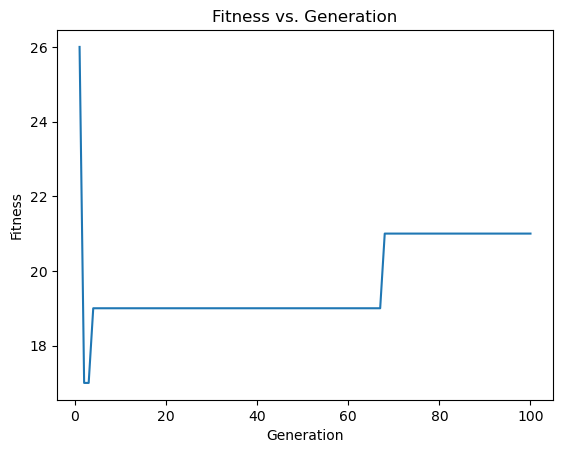

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define genetic algorithm parameters

psize = 100     #population
mr = 0.01      #mutation rate
ngen = 100      #generations

# Define problem-specific parameters


features= 5
n_customers = 26
data = [[7, 9, 3, 10, 9],
        [5, 0, 0, 10, 2],
        [5, 4, 4, 4, 4],
        [7, 1, 7, 8, 3],
        [0, 1, 4, 4, 1],
        [10, 6, 10, 4, 5],
        [8, 1, 7, 9, 0],
        [6, 2, 5, 0, 1],
        [2, 0, 2, 6, 2],
        [4, 6, 1, 5, 0],
        [7, 5, 0, 10, 7],
        [3, 10, 4, 8, 2],
        [7, 0, 2, 1, 2],
        [7, 0, 4, 0, 10],
        [2, 2, 0, 4, 4],
        [7, 6, 2, 9, 9],
        [7, 7, 8, 6, 9],
        [8, 7, 8, 6, 0],
        [3, 7, 1, 8, 1],
        [2, 2, 8, 6, 3],
        [0, 2, 0, 3, 8],
        [5, 1, 8, 6, 8],
        [5, 2, 5, 9, 4],
        [4, 4, 5, 4, 7],
        [3, 10, 0, 1, 0],
        [4, 5, 7, 0, 1]]


def fitness(array):
    expected_customers = (array >= data).sum(axis=1)
    return (expected_customers >= 3).sum()   #checking if the sum of generated array is >= 3


def selection(population, fitnesses):
    total_fitness = sum(fitnesses)
    probabilities = [f/total_fitness for f in fitnesses]
    return random.choices(population, weights=probabilities, k=2)


def crossover(parent1, parent2):
    child = np.empty_like(parent1)
    for i in range(features):
        if random.random() < 0.7:
            child[i] = parent1[i]
        else:
            child[i] = parent2[i]
    return child

def mutation(array):
    for i in range(features):
        if random.random() < mr:
            array[i] = random.randint(0, n_customers-1)
    return array

# Initialize population
population = [np.random.randint(0, n_customers, features) for i in range(psize)] 

offspring = []

fitnesses_over_time = []

# Evolution loop
for generation in range(ngen):
    fitnesses = [fitness(array) for array in population]
    parents = [selection(population, fitnesses) for i in range(psize//2)]
    
    for parent1, parent2 in parents:
      child1 = crossover(parent1, parent2)
      child2 = crossover(parent1, parent2)
      child1 = mutation(child1)
      child2 = mutation(child2)
      while child1.sum() > 25:
        index = np.random.randint(0, features)
        child1[index] = np.random.randint(0, n_customers)
      while child2.sum() > 25:
          index = np.random.randint(0, features)
          child2[index] = np.random.randint(0, n_customers)
    
    offspring.append(child1)
    offspring.append(child2)
    population = offspring
    best_array = population[np.argmax(fitnesses)]
    if (generation+1) % 10 == 0:
        print("Generation:", generation+1, "Fitness:", max(fitnesses))
        print(best_array)
    fitnesses_over_time.append(max(fitnesses))
# Plot the fitness over time
plt.plot(range(1, ngen+1), fitnesses_over_time)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness vs. Generation')
plt.show()